In [ ]:
import random
data=[]
for i in range(50):
  data.append(random.randrange(20, 50))

print(data)

In [ ]:
import numpy as np
arr = np.array(data)
print(arr)

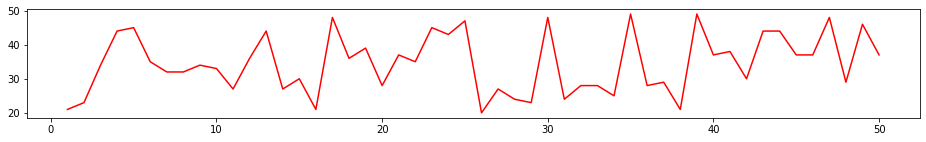

In [ ]:

def draw_graph(arr,col):
  #print(arr)
  import matplotlib as mpl
  import matplotlib.pyplot as plt
  index=list(range(1, len(arr)+1))
  #print(index)
  fig = plt.figure(figsize=(16, 2))
  plt.plot(index,arr, '-',color=col)

draw_graph(arr,'red')

In [ ]:
import math
import statistics as stats
import numpy

def sine(a):
  return math.sin(a)
def cosine(a):
  return math.cos(a)
def mult(a,b):
  return a*b

#find amplitudes for current angle over all data 
def calc_amplitude_for_angle(arr,w1):
  ind_arr=np.array(list(range(1, len(arr)+1)))
  temp_angle=ind_arr*w1
  ind_sine=np.array(list(map(sine,temp_angle)))
  ind_cosine=np.array(list(map(cosine,temp_angle)))

  arr2=np.array(list(map(mult,arr,ind_sine)))
  a1=sum(arr2)/len(arr2)

  arr3=np.array(list(map(mult,arr,ind_cosine)))
  b1=sum(arr3)/len(arr3)

  #print(a1)
  #print(b1)
  #print("fn(t)=",a1,"sin(",w1,"t) +",b1,"cos(",w1,"t)")

  return a1,b1


#bring back original data
def back_calculation_using_amplitude(arr,w1,a1,b1):
  ind_arr=np.array(list(range(1, len(arr)+1)))
  temp_angle=ind_arr*w1
  ind_sine=np.array(list(map(sine,temp_angle)))
  ind_cosine=np.array(list(map(cosine,temp_angle)))
  fn=a1*ind_sine+b1*ind_cosine
  #print(fn)
  return fn


def find_for_angle(w1,arr):
  #w1=1.2
  a1,b1=calc_amplitude_for_angle(arr,w1)
  fn=back_calculation_using_amplitude(arr,w1,a1,b1)
  rest_arr=arr-fn

  #draw_graph(arr)
  #draw_graph(fn)
  #draw_graph(rest_arr)

  '''print("stdev:")
  print(stats.stdev(arr))
  print(stats.stdev(rest_arr))

  print("mean:")
  print(stats.mean(arr))
  print(stats.mean(rest_arr))
  '''
  return stats.stdev(arr)-stats.stdev(rest_arr)#+stats.mean(arr)-stats.mean(rest_arr)

def angle_for_mx_val(arr):
  ws=numpy.arange(0.1,50,0.1)
  res_arr=[]
  mx_angl=0.1
  mx_val=find_for_angle(0.1,arr)
  for i in ws:
    res=find_for_angle(i,arr)
    if res>mx_val:
      mx_val=res
      mx_angl=i
    #print("at w=",i," value decreased by ",res)
    #res_arr.append(res)
  #print(res_arr)

  #draw_graph(res_arr)
  #print(np.amax(res_arr))
  return mx_angl



42.6 0.020260328095298055 -0.017340705005702263
33.300000000000004 0.004876695724250255 0.012243701733043934
24.000000000000004 -0.003820076450042933 -0.006882189505612643
28.900000000000002 0.005184783229421175 0.010800224323284908
22.000000000000004 0.14530696746183883 -0.04250144320703839
28.900000000000002 0.004678830631710191 0.004862042274172324
28.400000000000002 0.012036423866102089 0.009417437630703206
14.200000000000001 0.015117002211209301 -0.00012201849801144249
24.000000000000004 -0.001486483067875577 -0.004072185553199006
19.6 -0.13691403163480131 -0.07575132474873357
42.6 0.01018302223511756 -0.009472765980934099
47.50000000000001 -0.0001084760456703826 -0.010636247833083985
33.300000000000004 0.001770414326075067 0.005196352525750854


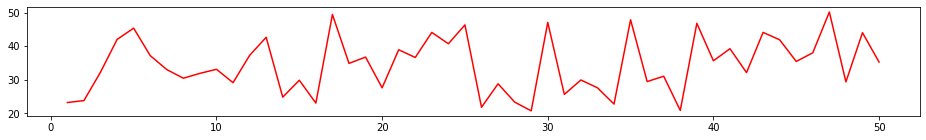

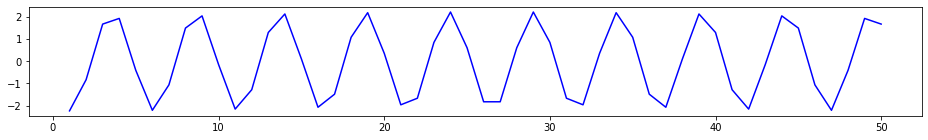

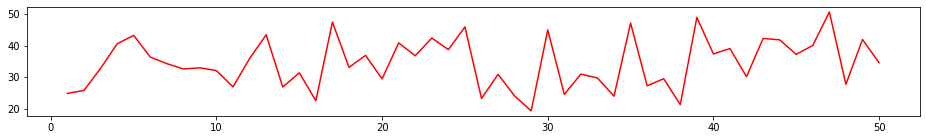

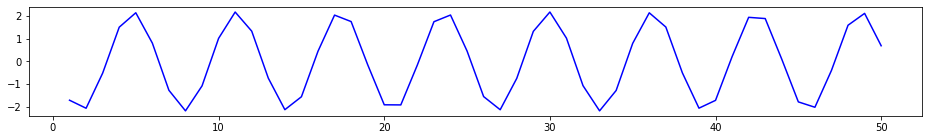

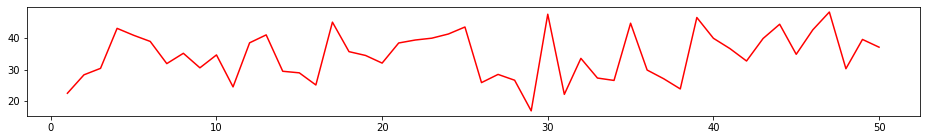

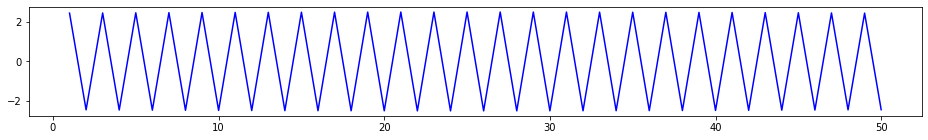

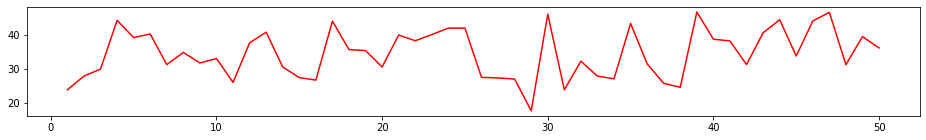

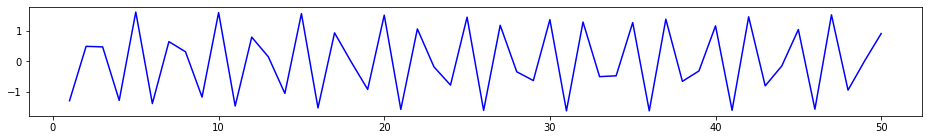

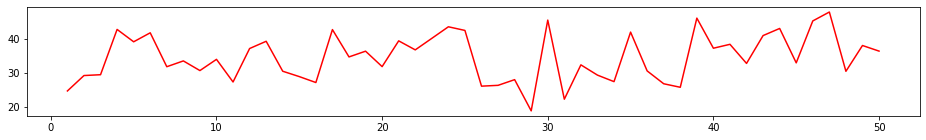

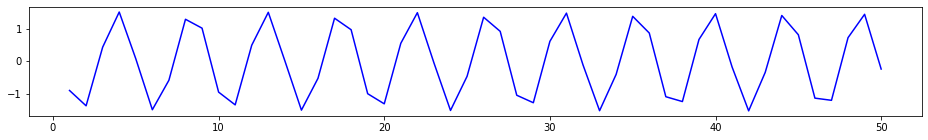

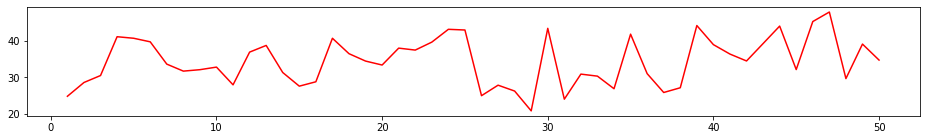

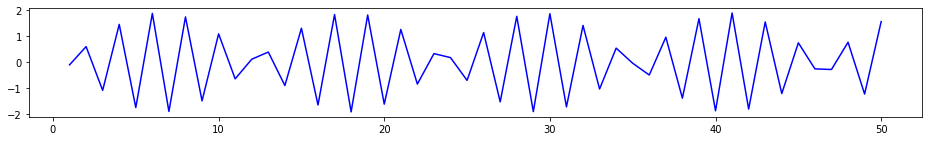

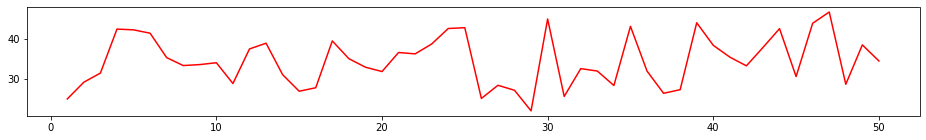

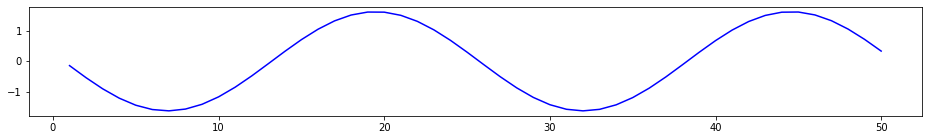

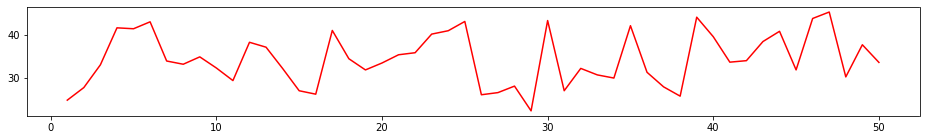

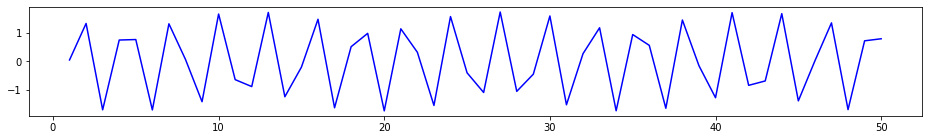

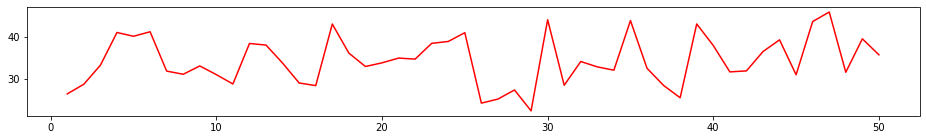

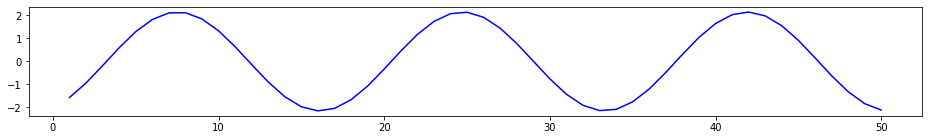

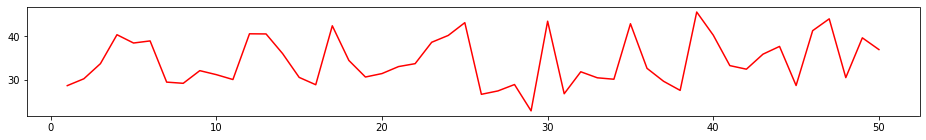

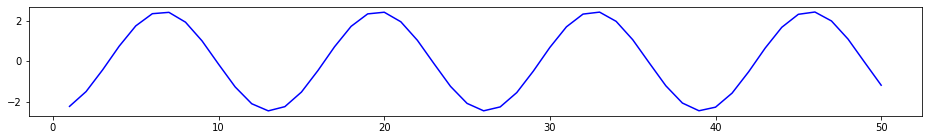

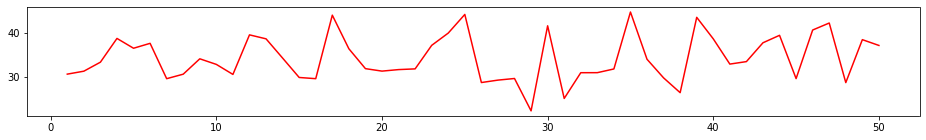

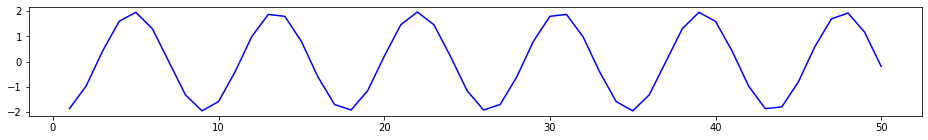

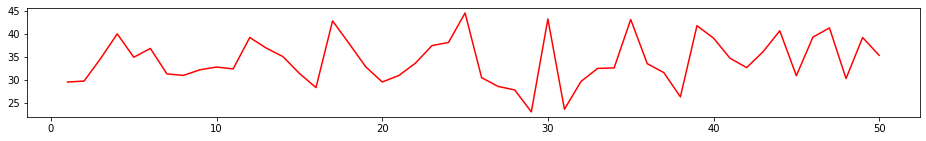

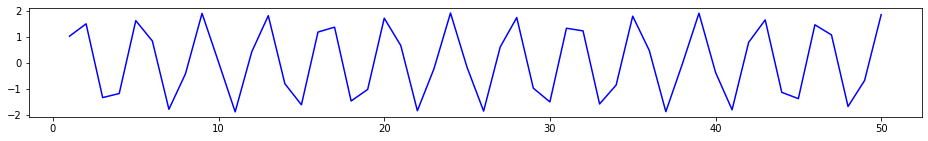

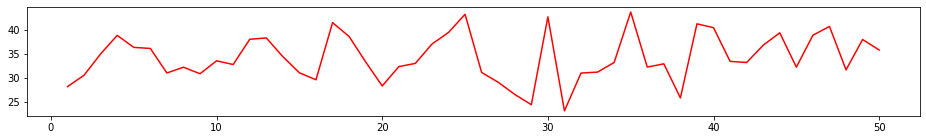

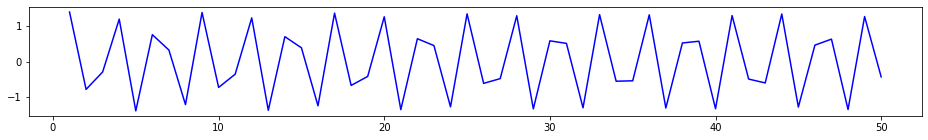

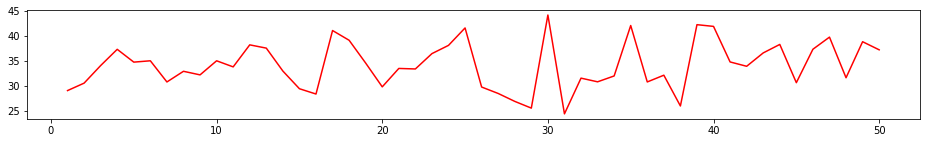

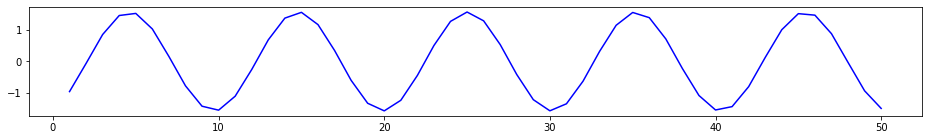

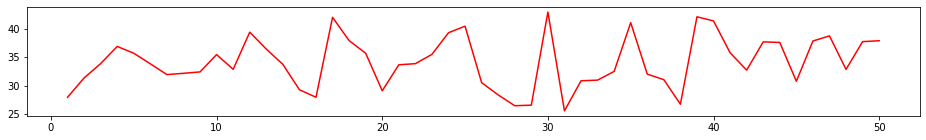

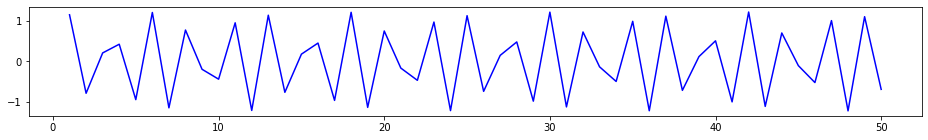

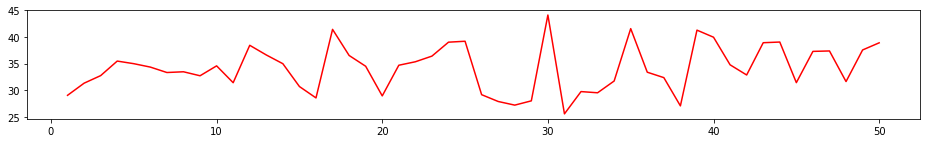

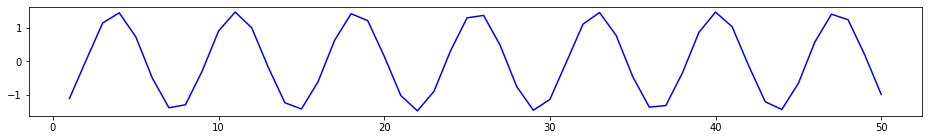

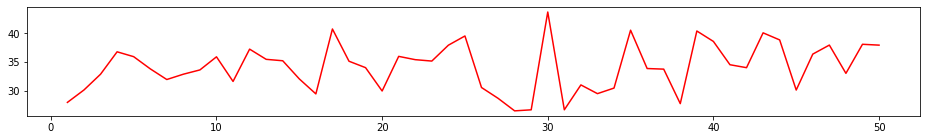

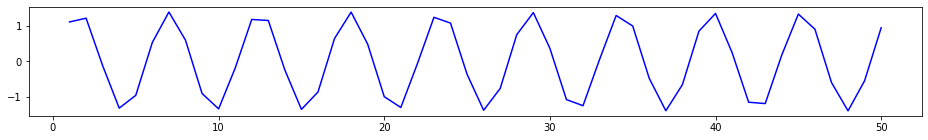

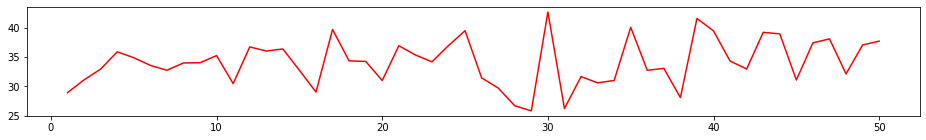

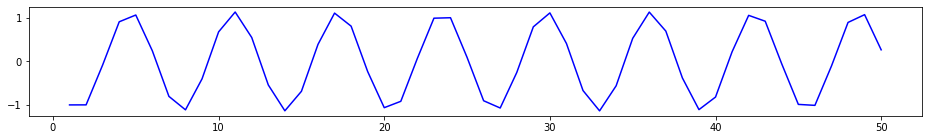

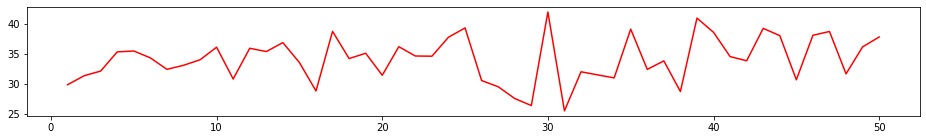

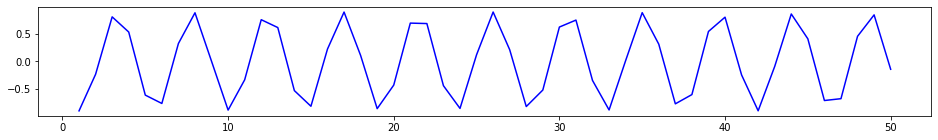

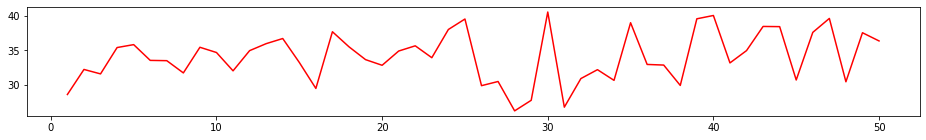

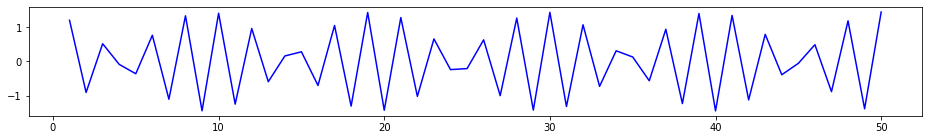

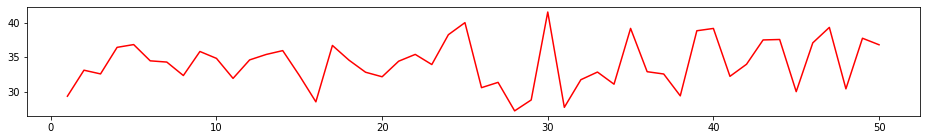

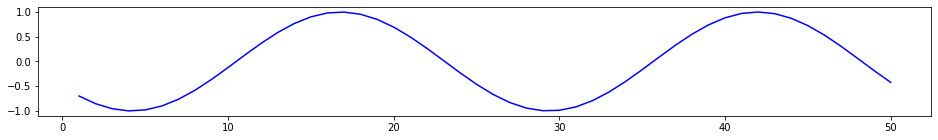

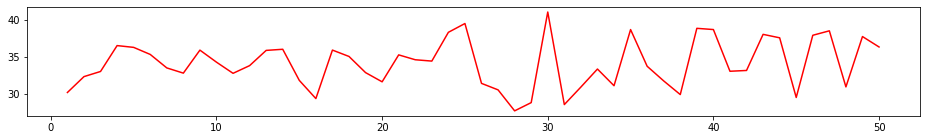

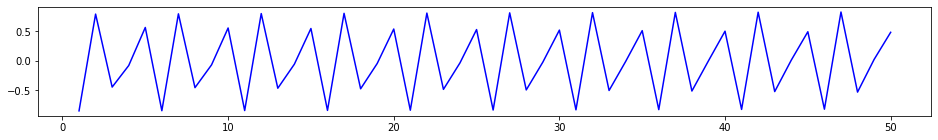

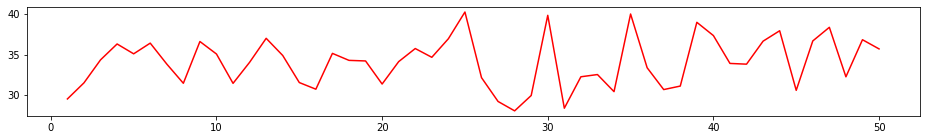

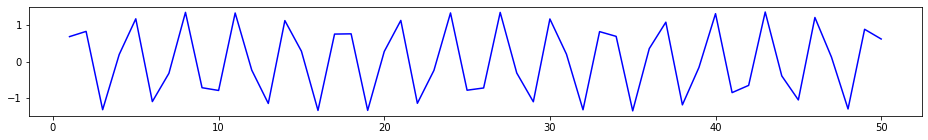

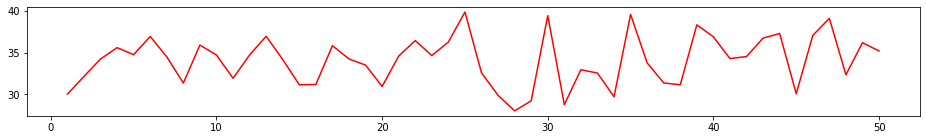

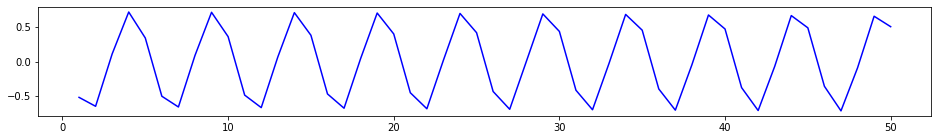

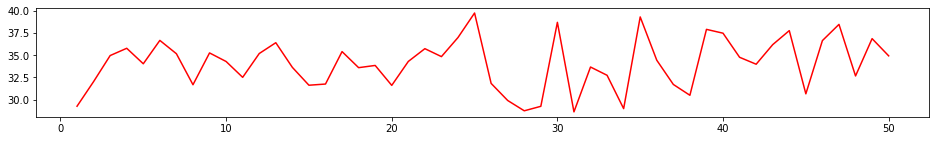

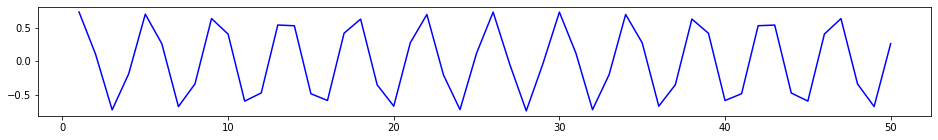

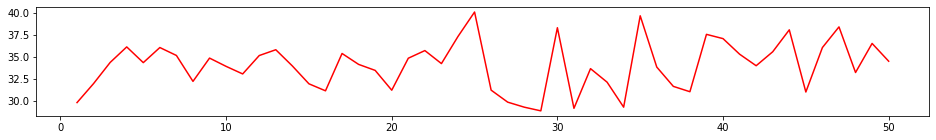

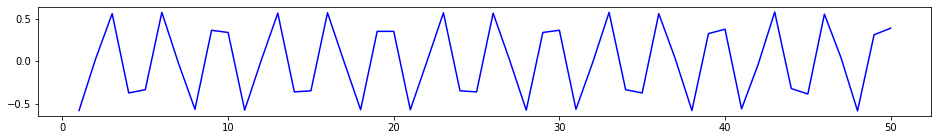

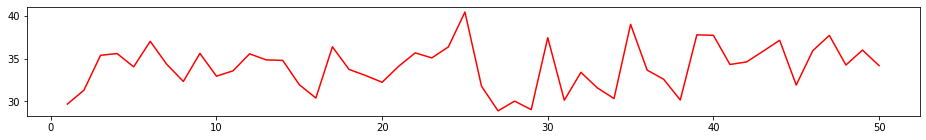

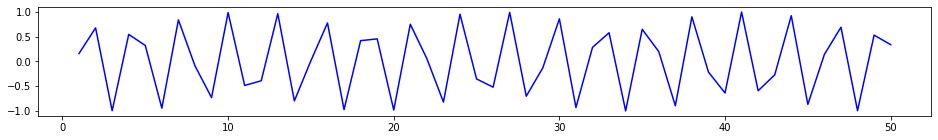

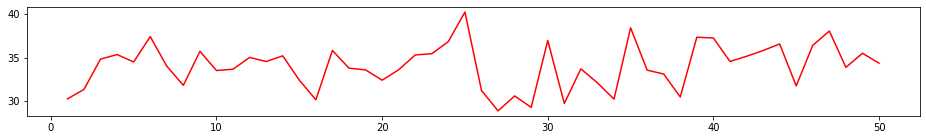

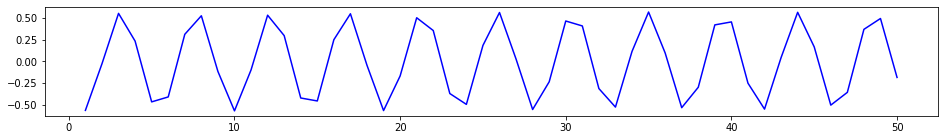

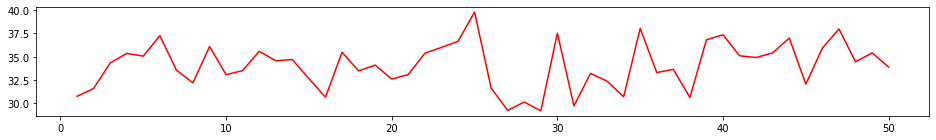

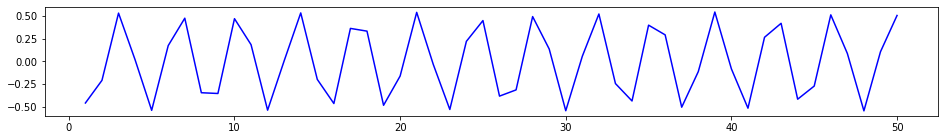

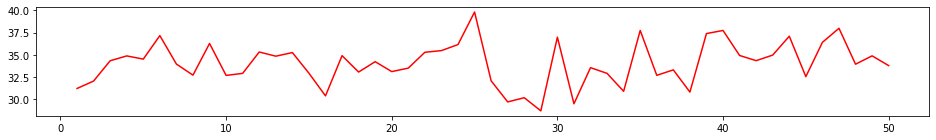

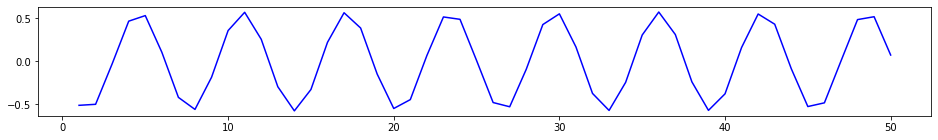

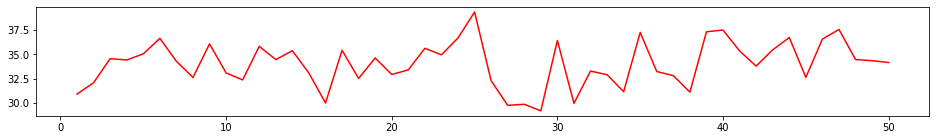

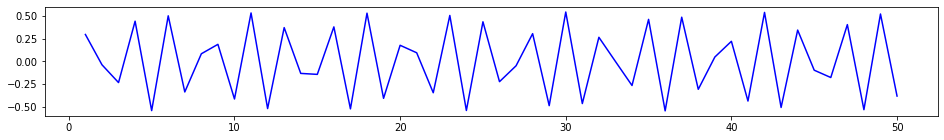

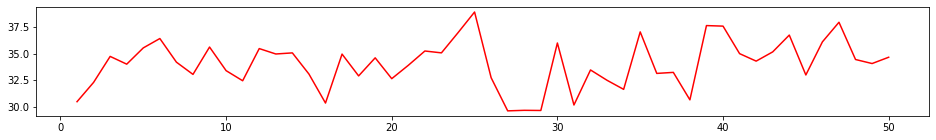

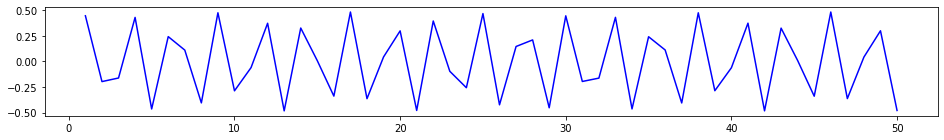

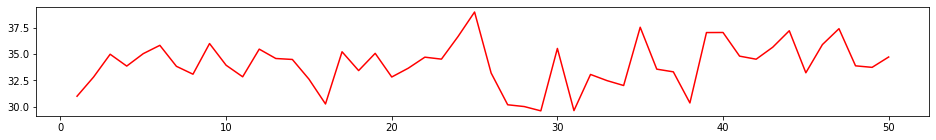

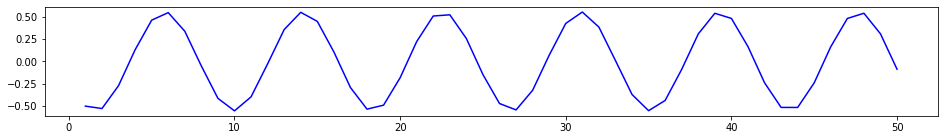

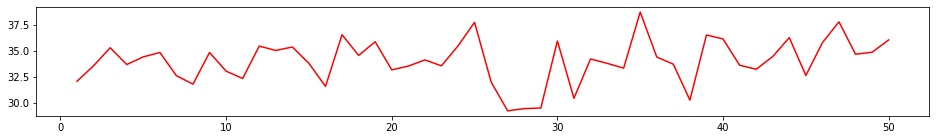

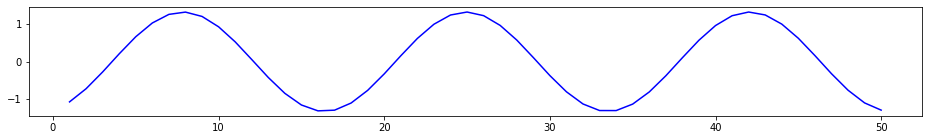

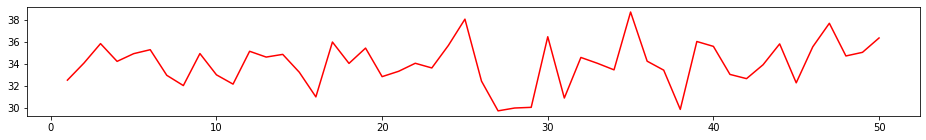

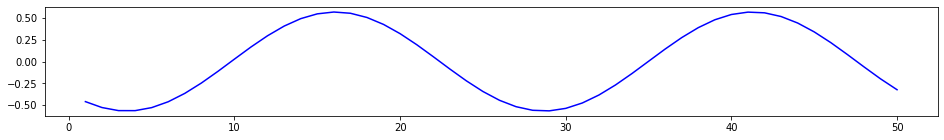

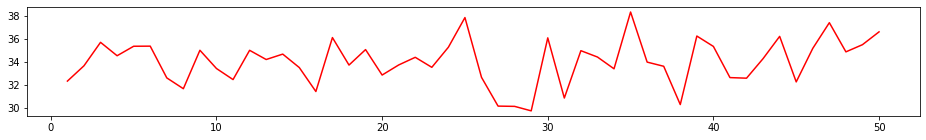

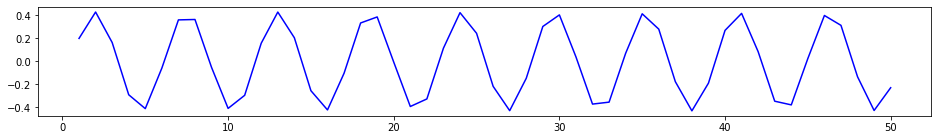

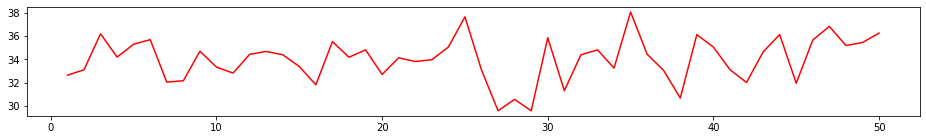

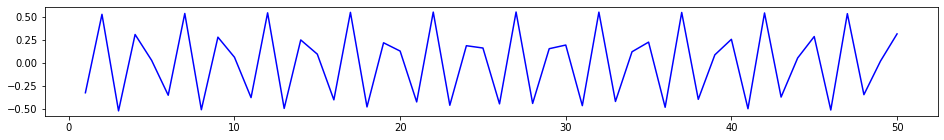

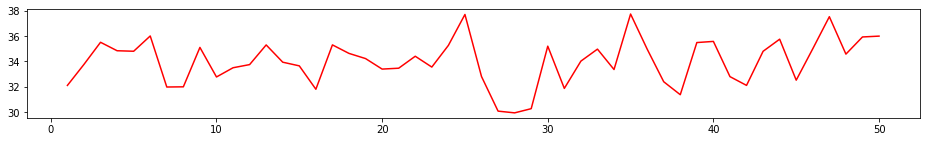

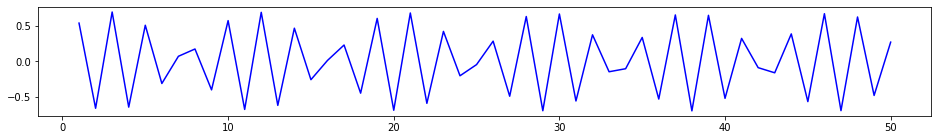

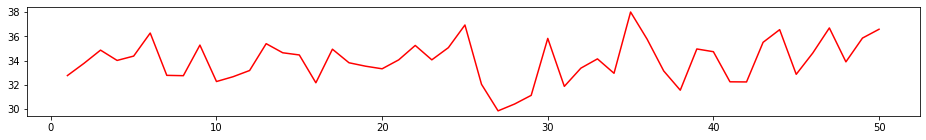

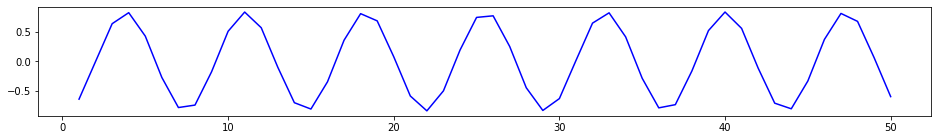

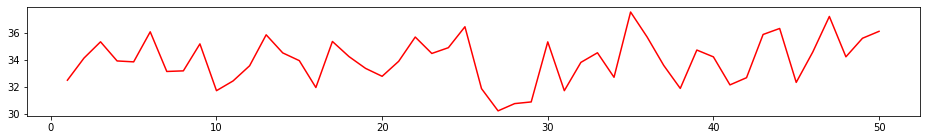

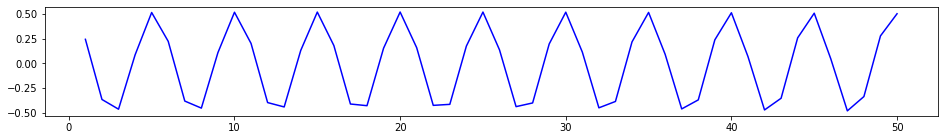

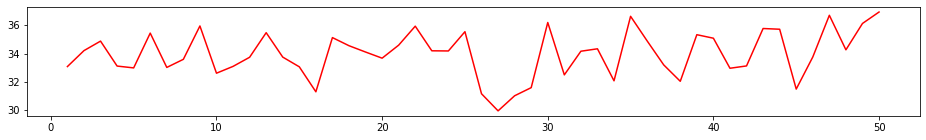

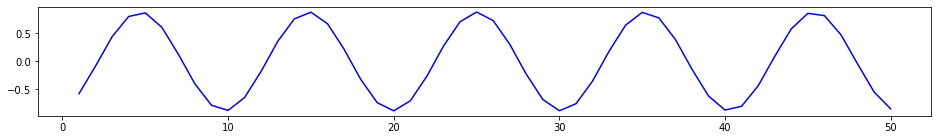

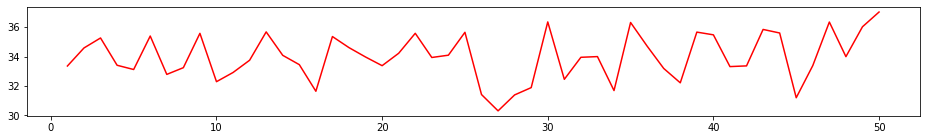

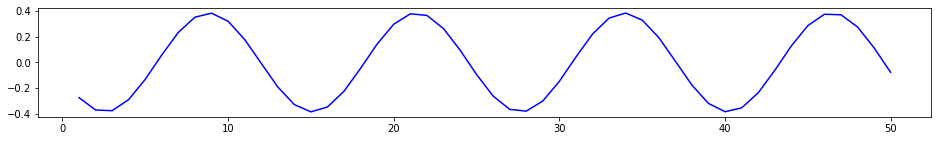

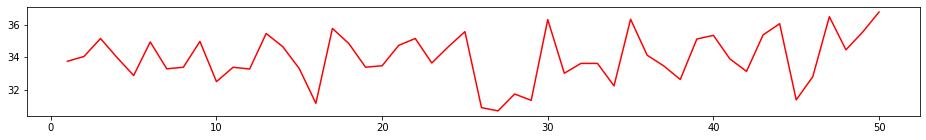

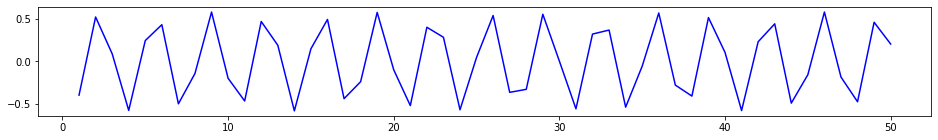

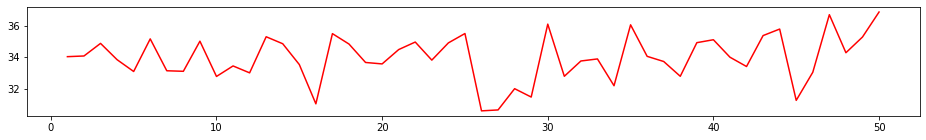

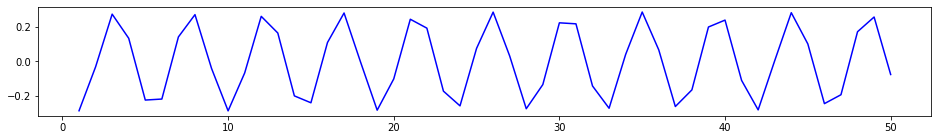

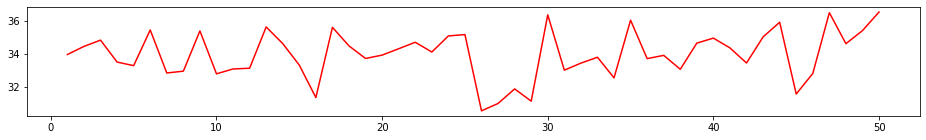

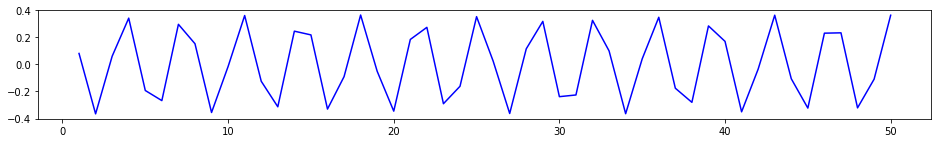

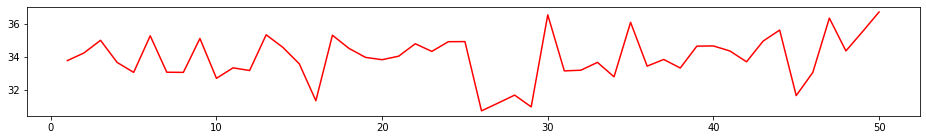

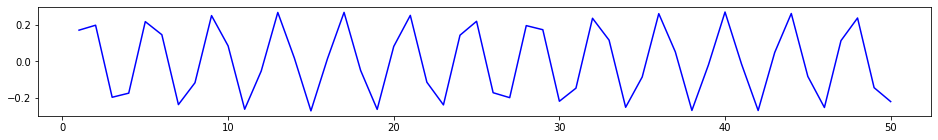

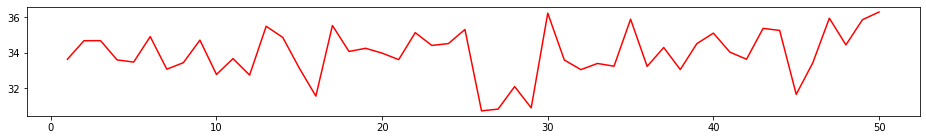

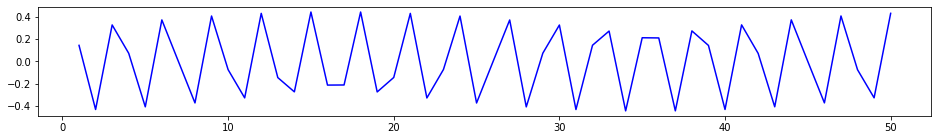

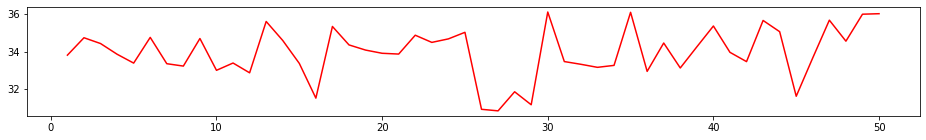

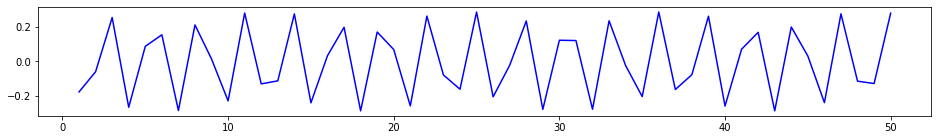

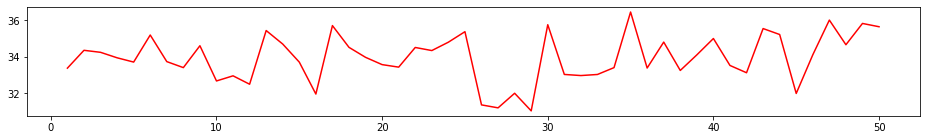

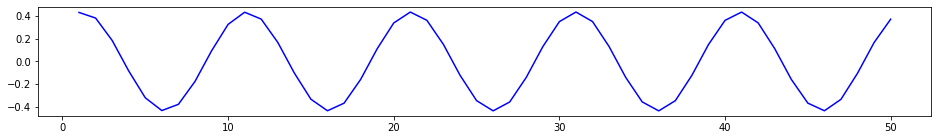

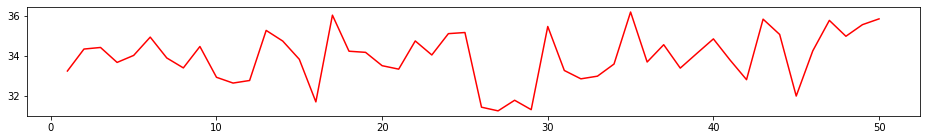

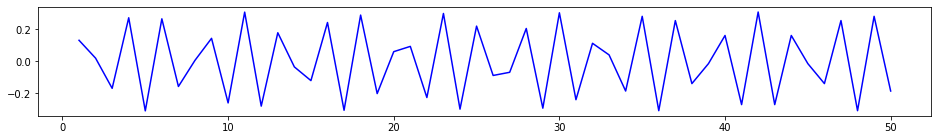

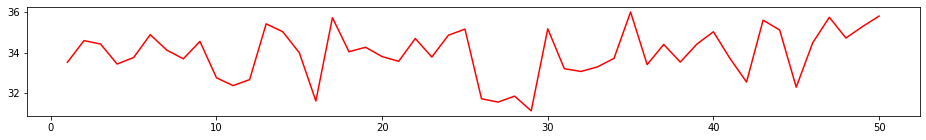

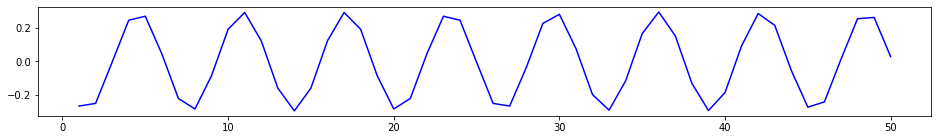

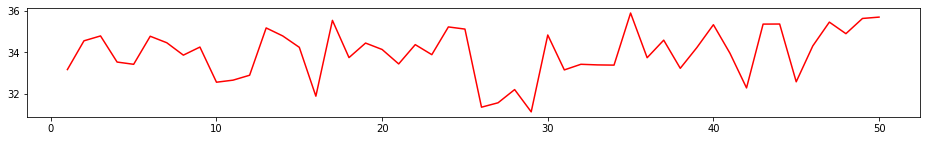

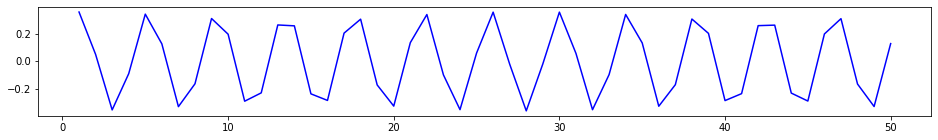

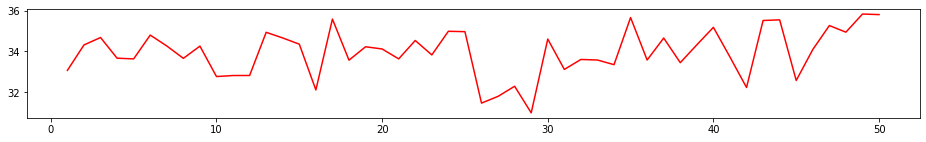

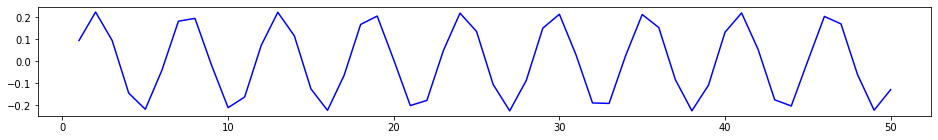

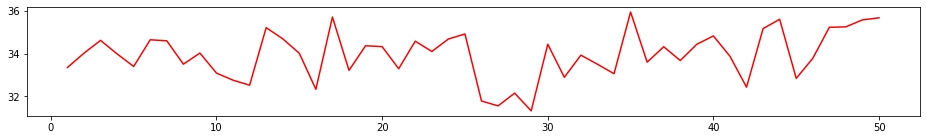

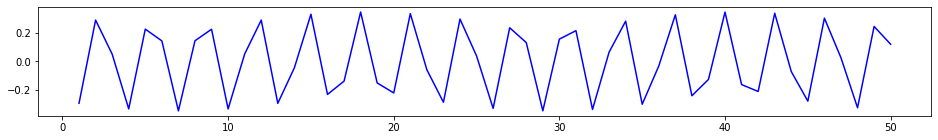

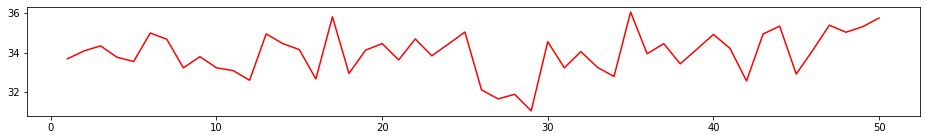

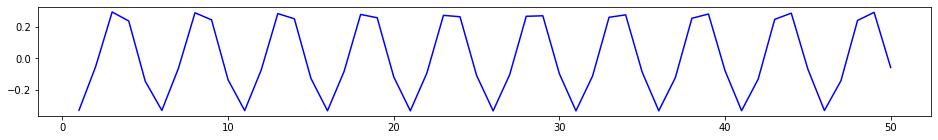

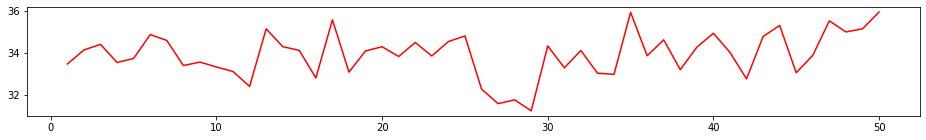

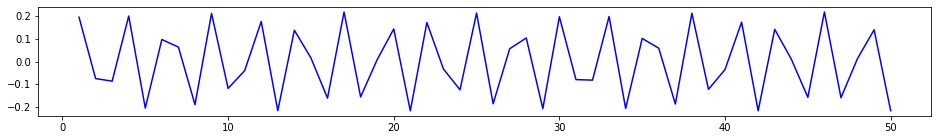

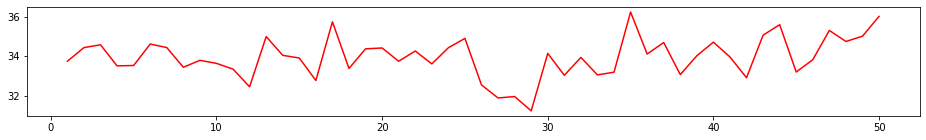

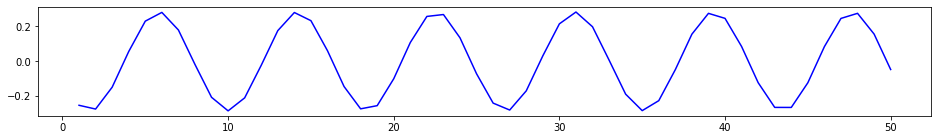

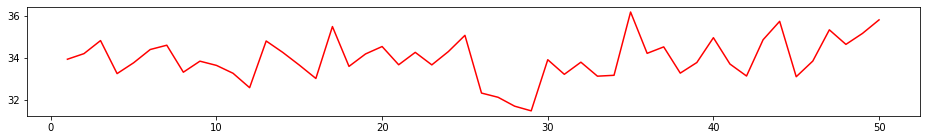

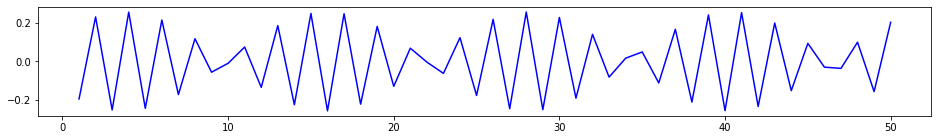

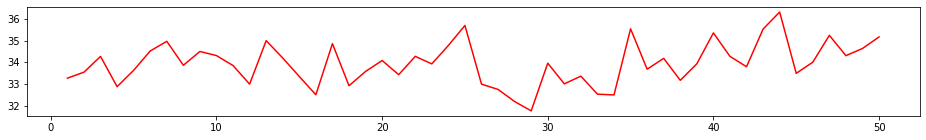

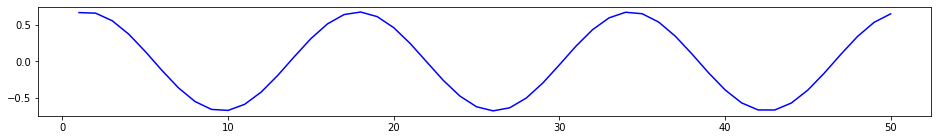

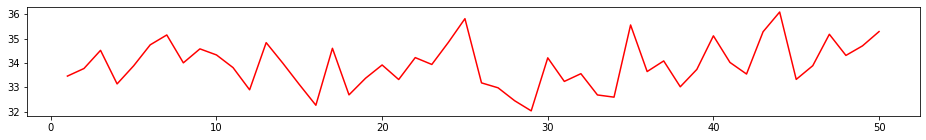

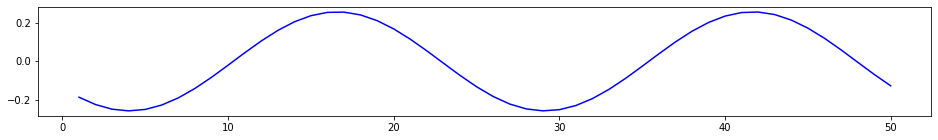

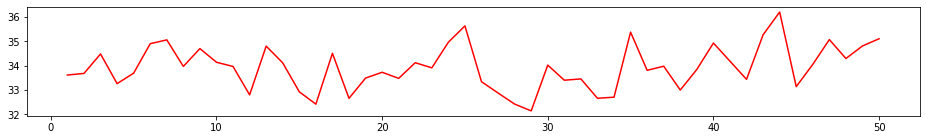

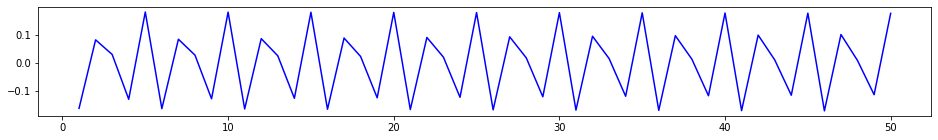

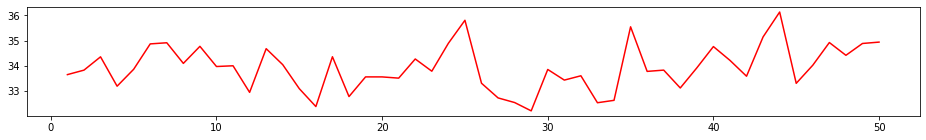

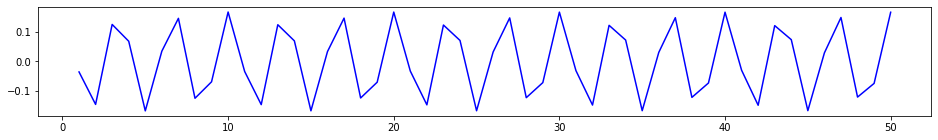

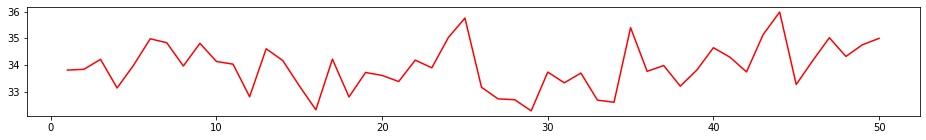

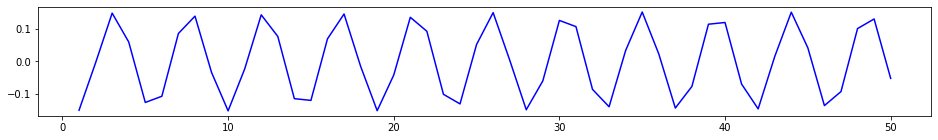

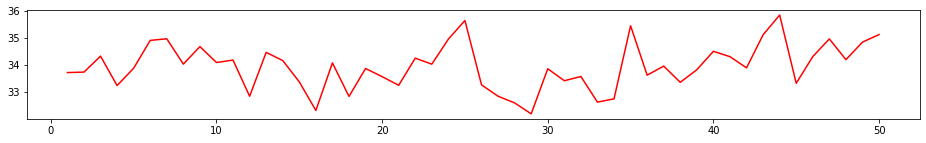

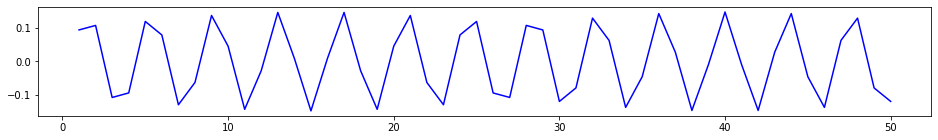

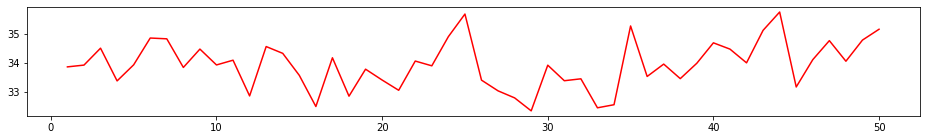

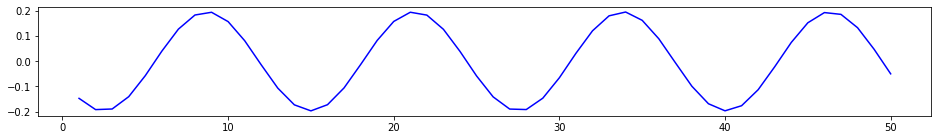

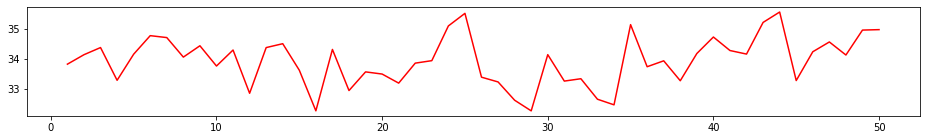

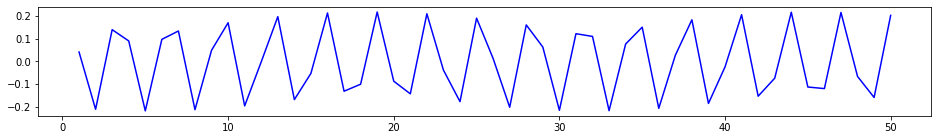

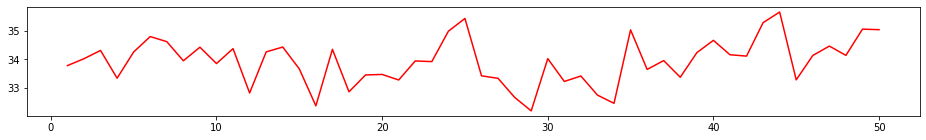

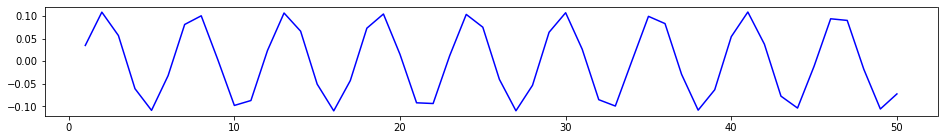

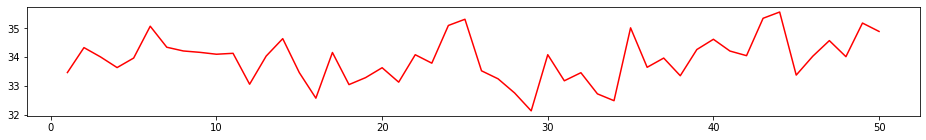

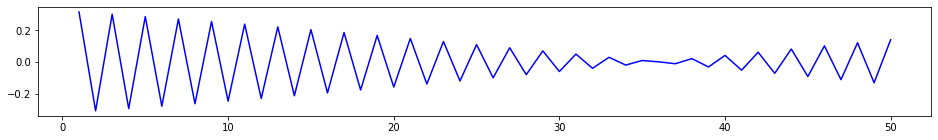

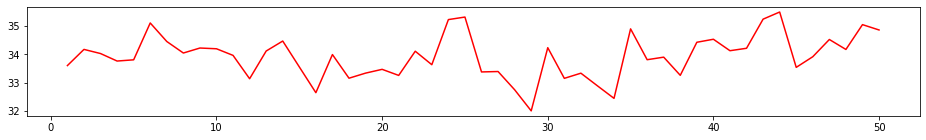

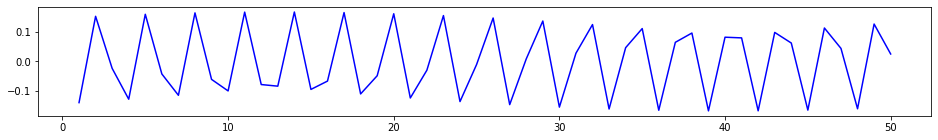

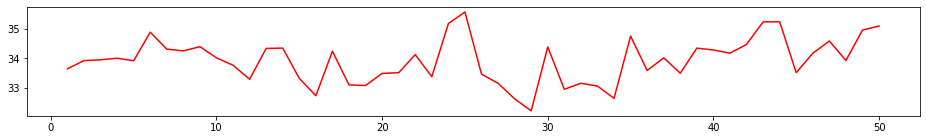

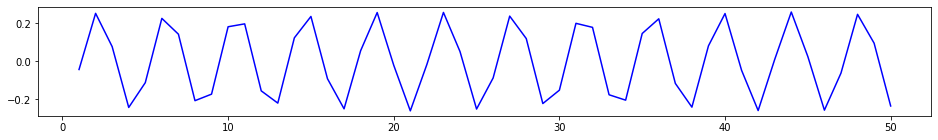

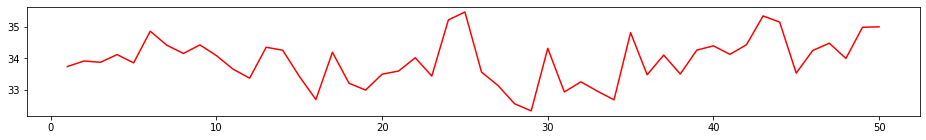

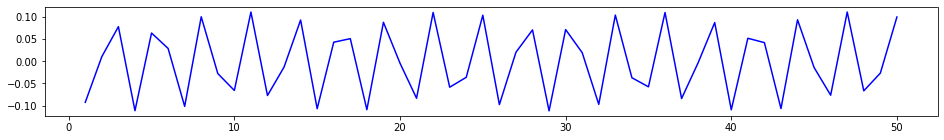

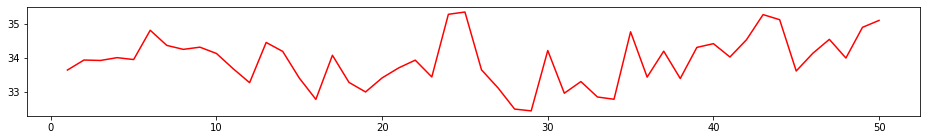

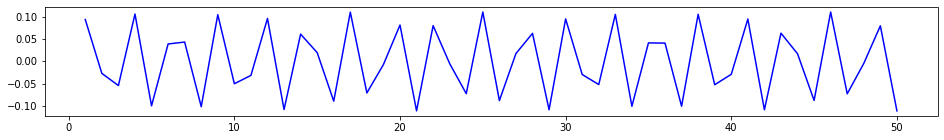

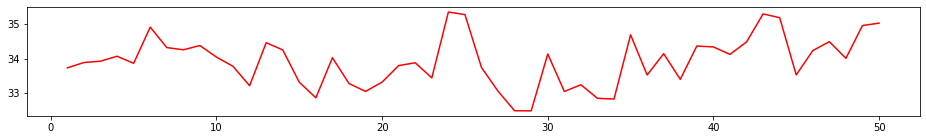

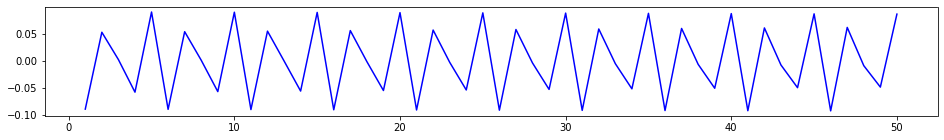

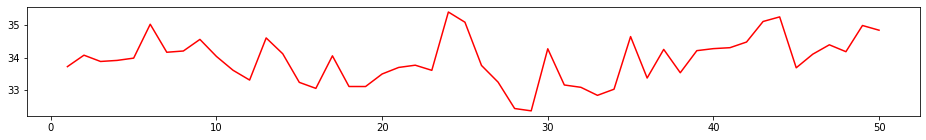

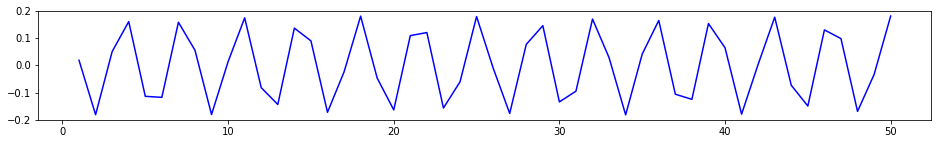

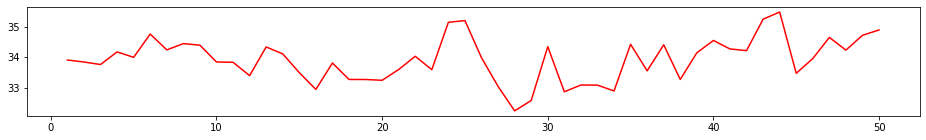

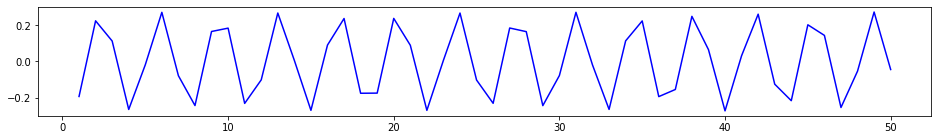

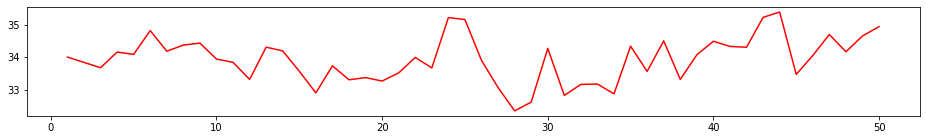

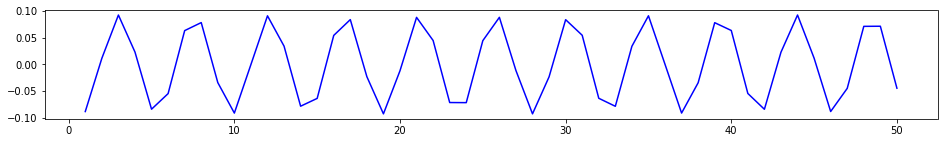

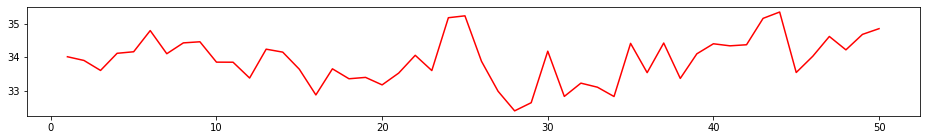

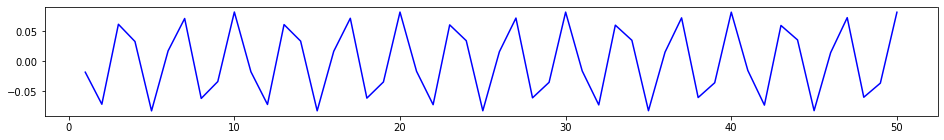

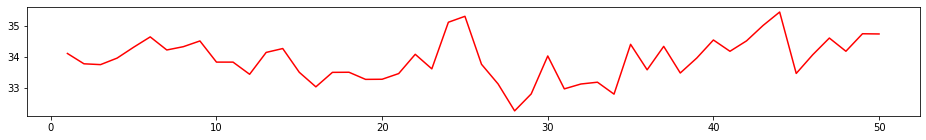

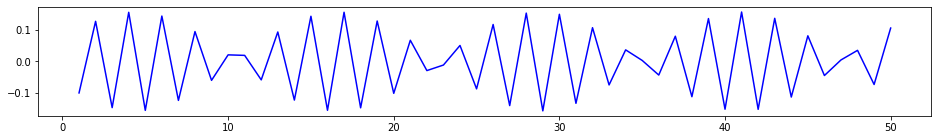

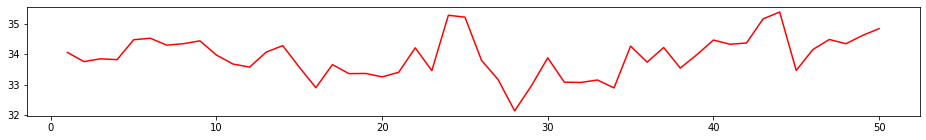

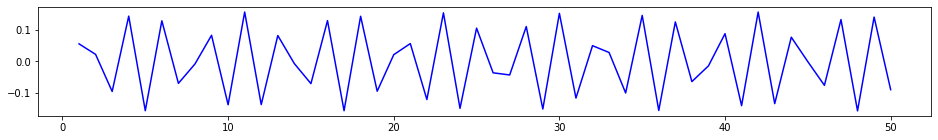

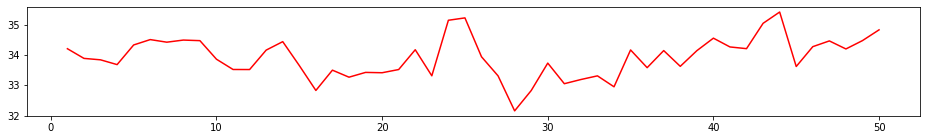

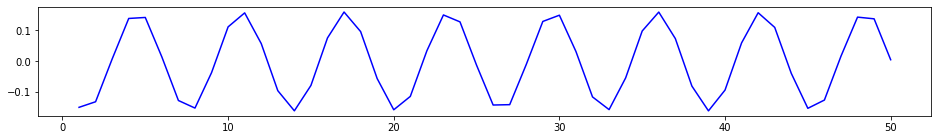

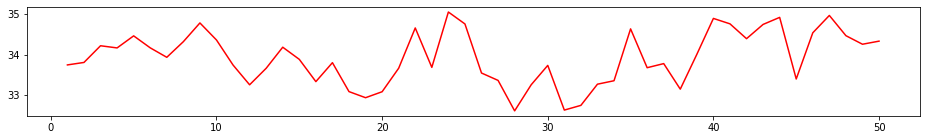

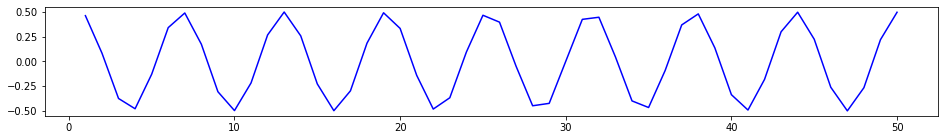

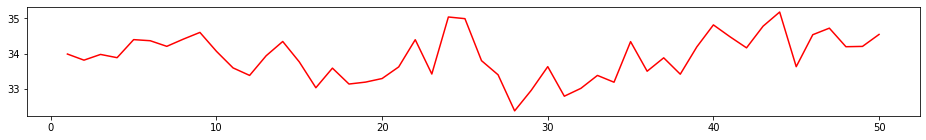

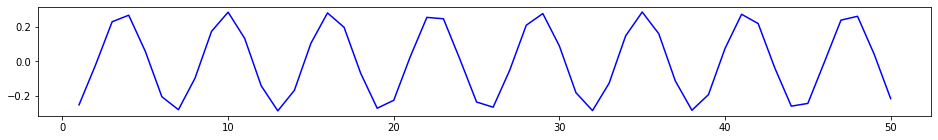

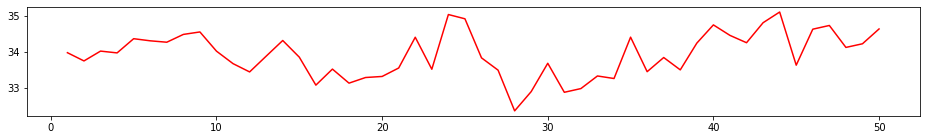

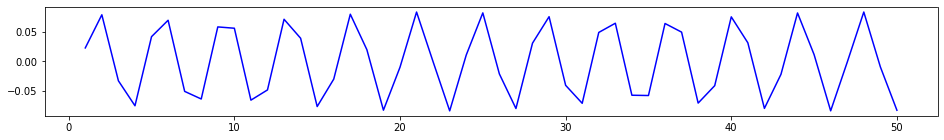

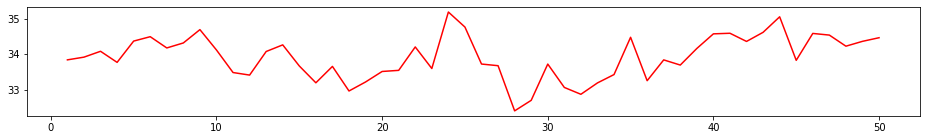

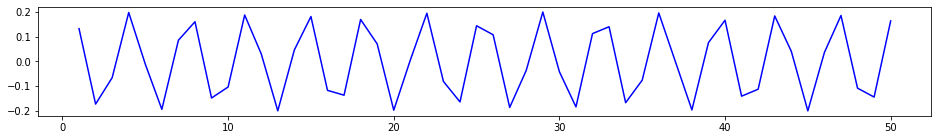

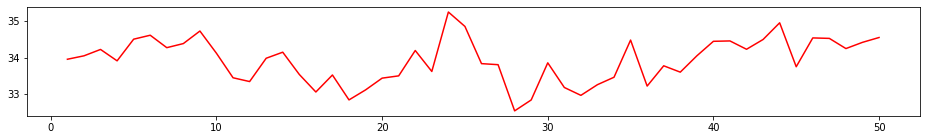

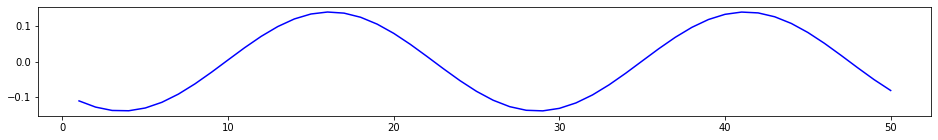

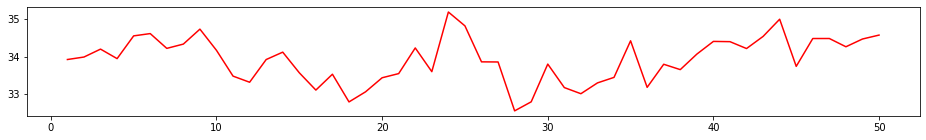

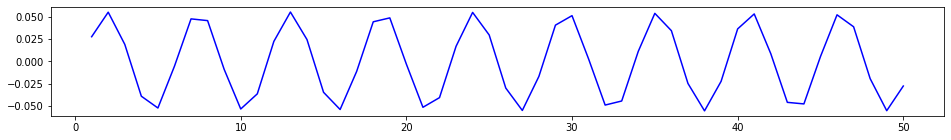

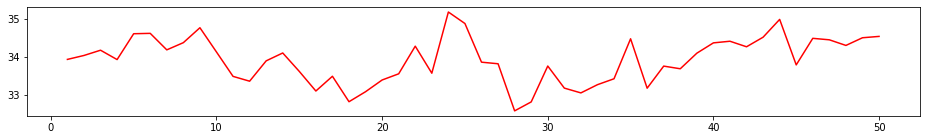

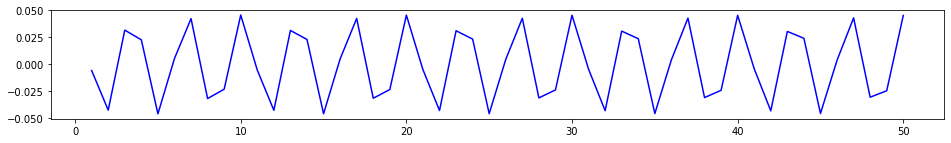

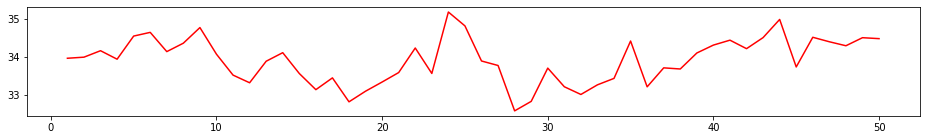

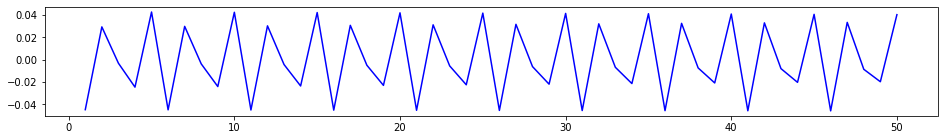

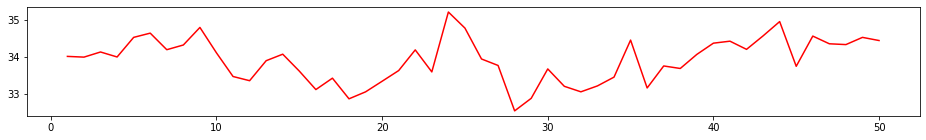

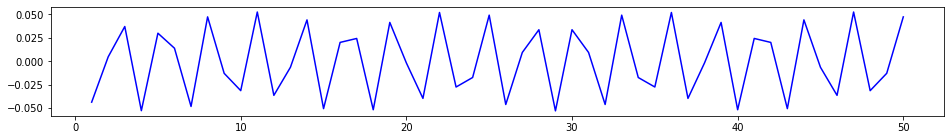

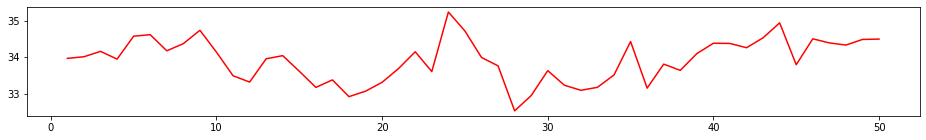

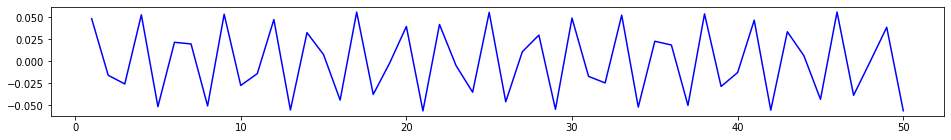

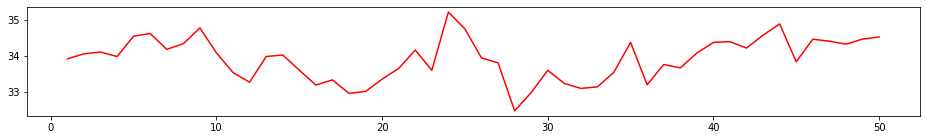

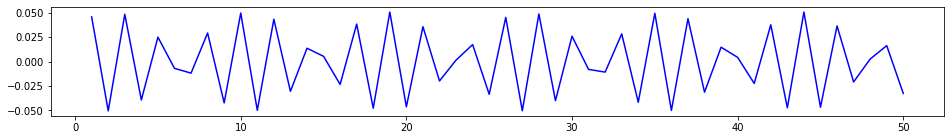

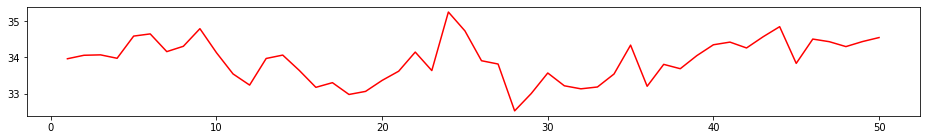

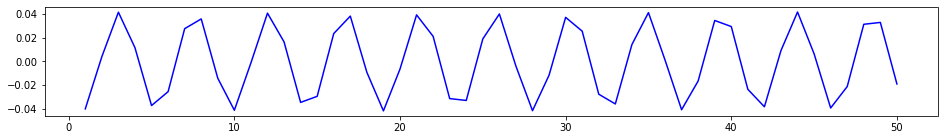

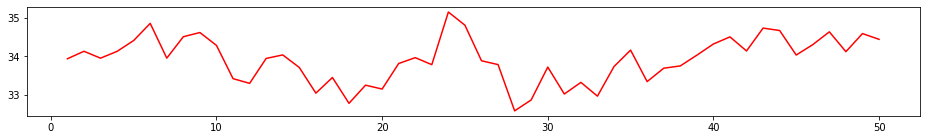

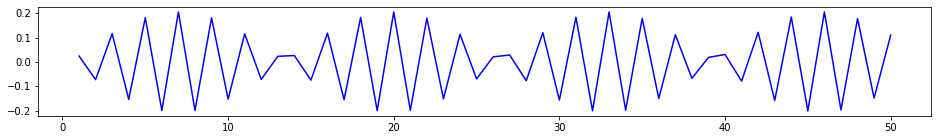

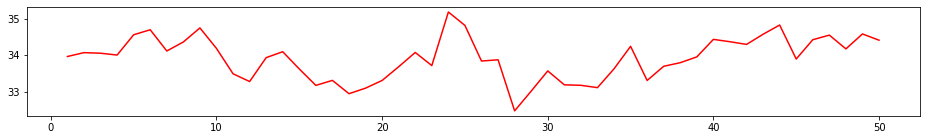

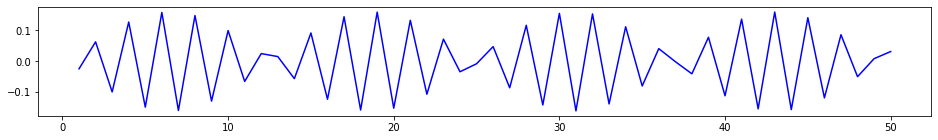

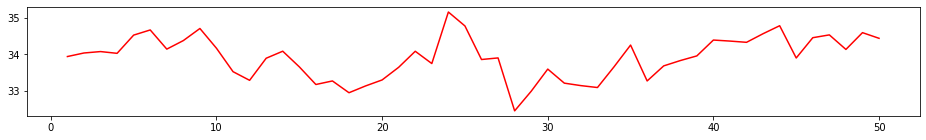

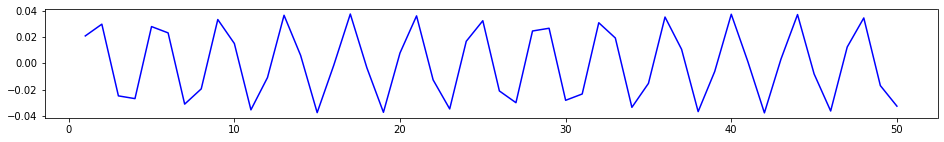

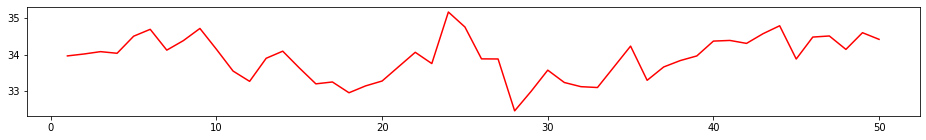

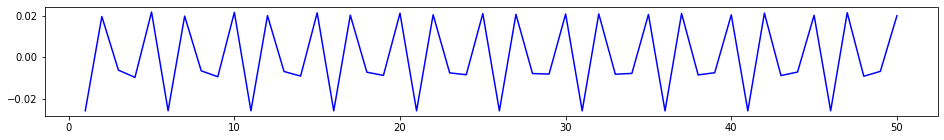

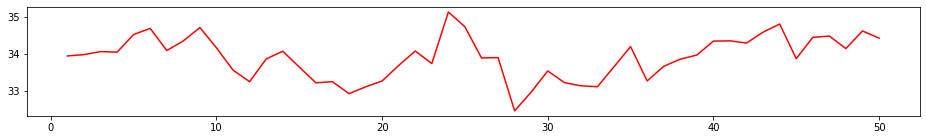

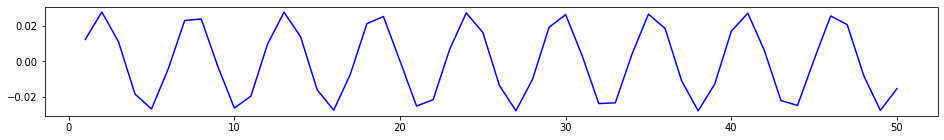

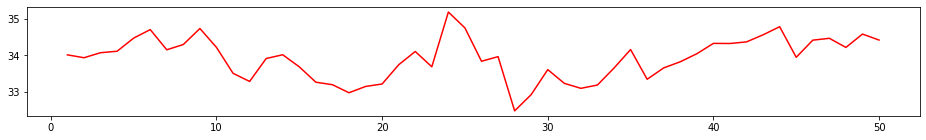

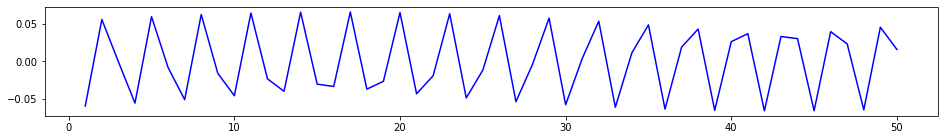

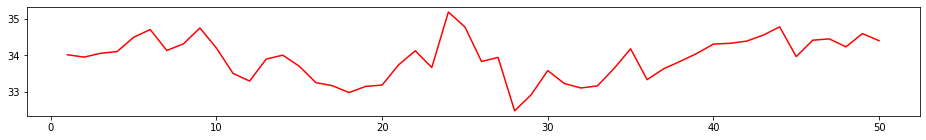

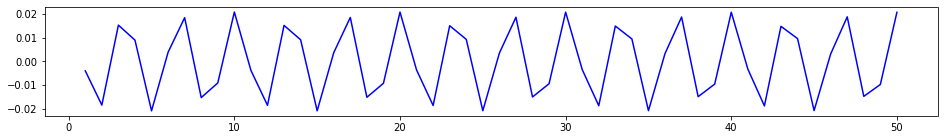

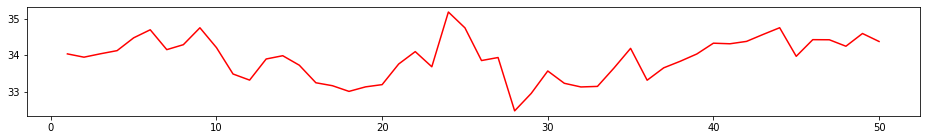

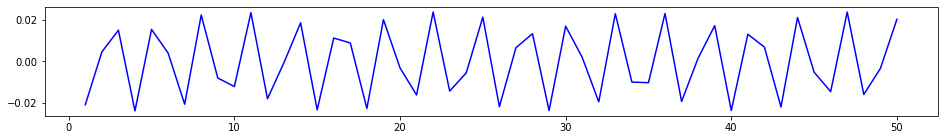

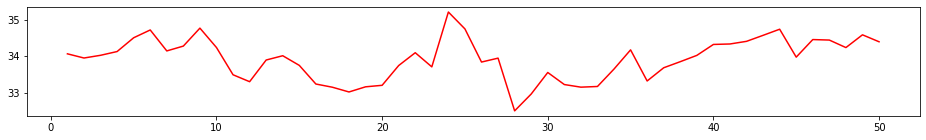

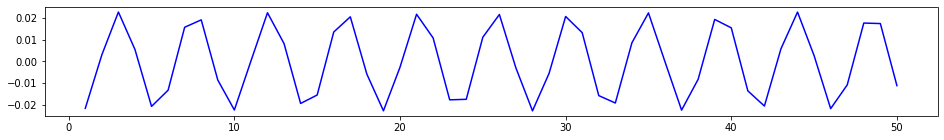

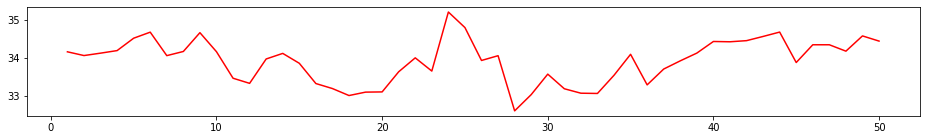

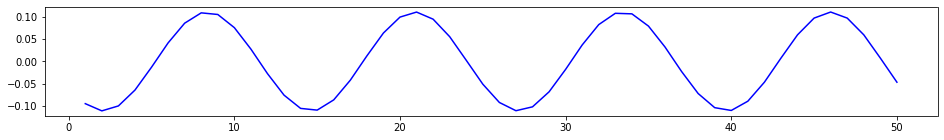

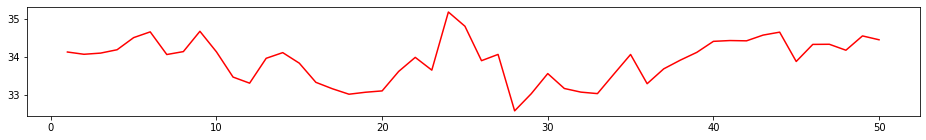

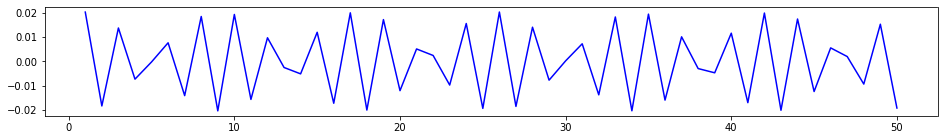

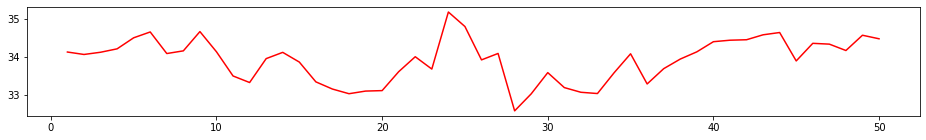

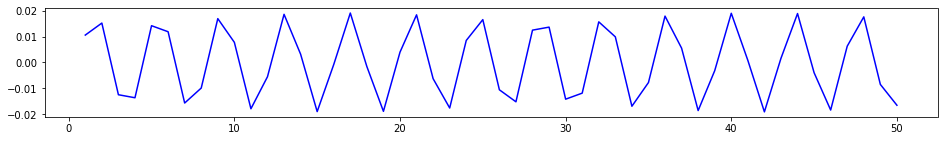

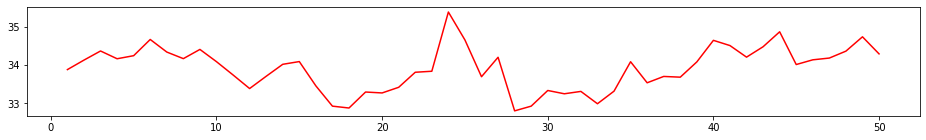

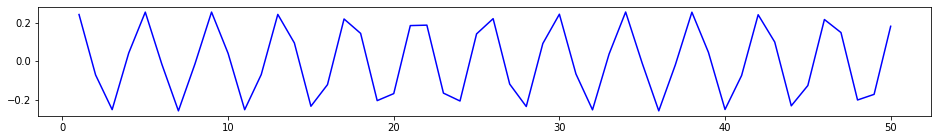

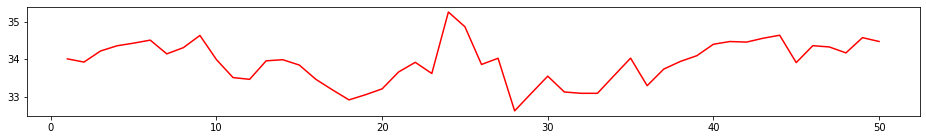

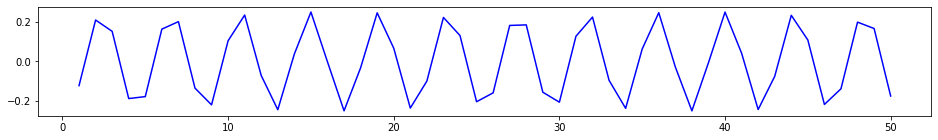

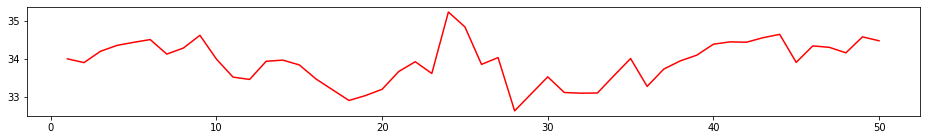

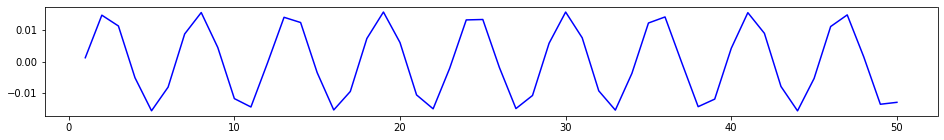

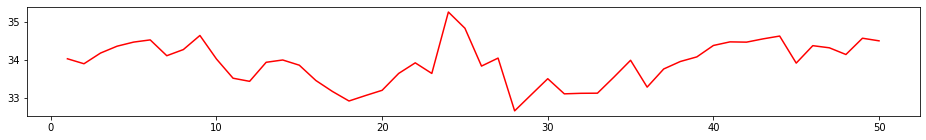

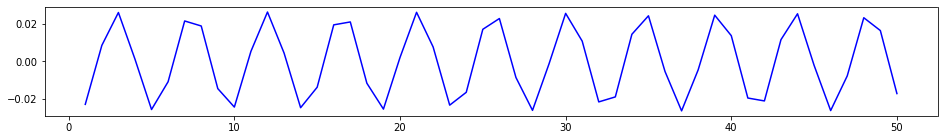

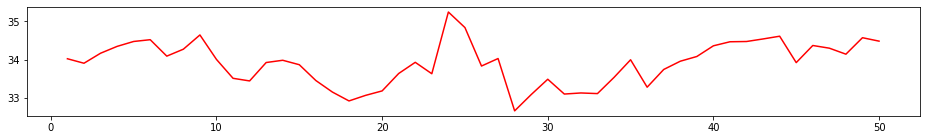

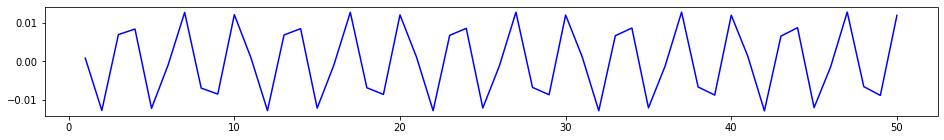

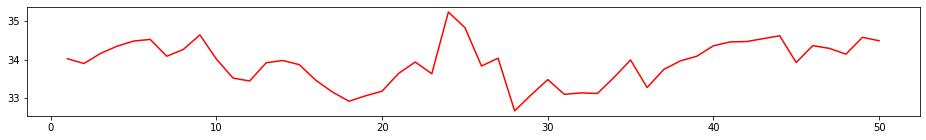

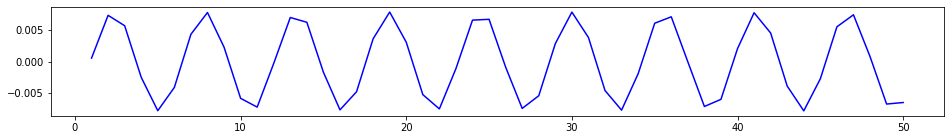

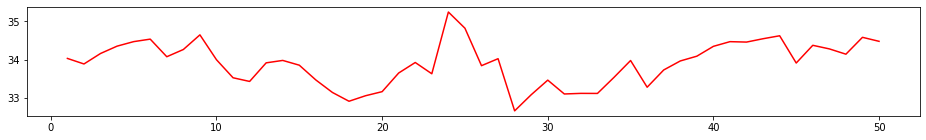

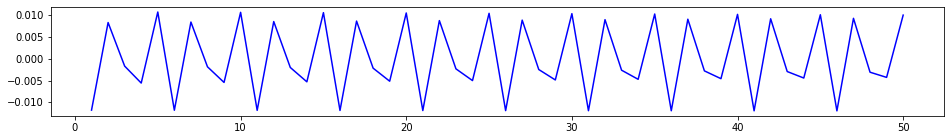

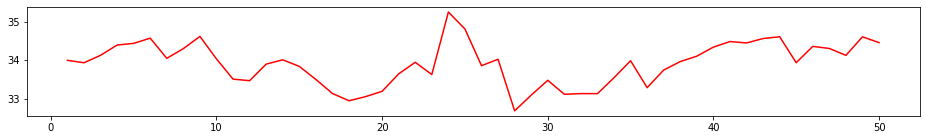

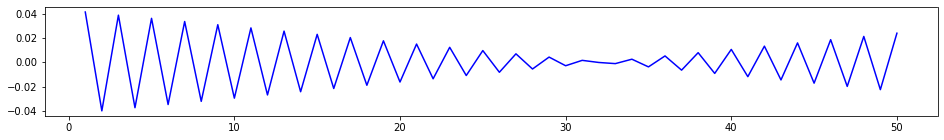

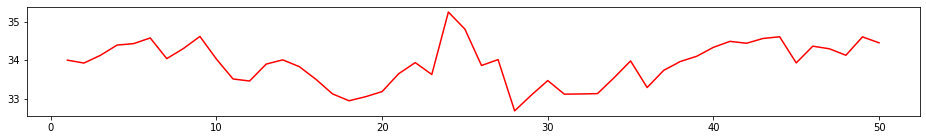

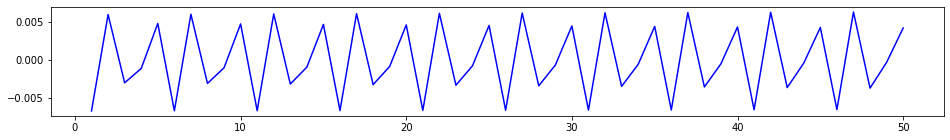

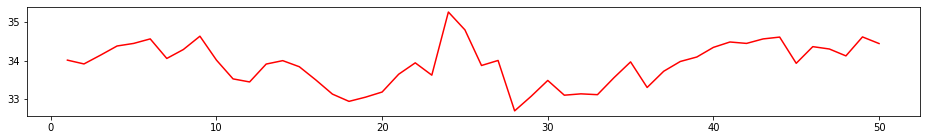

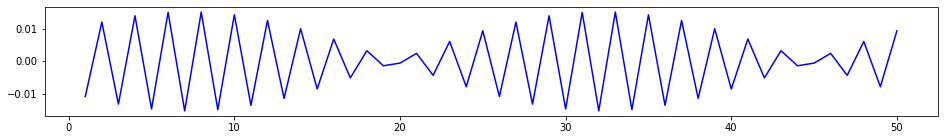

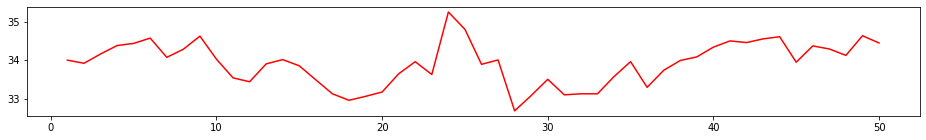

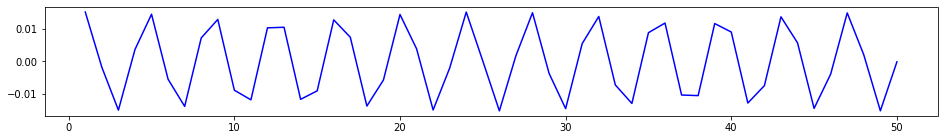

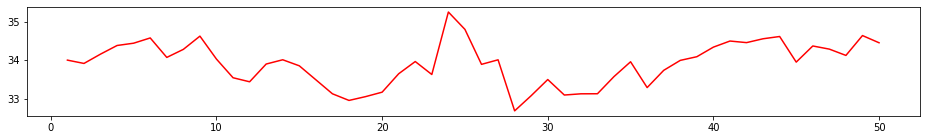

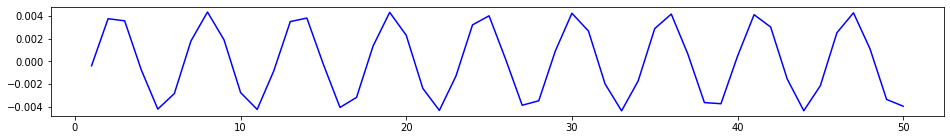

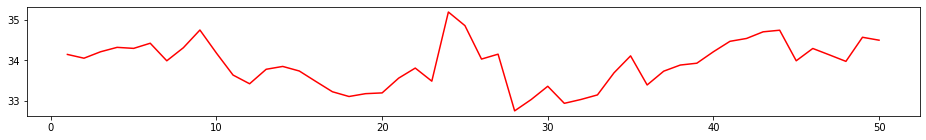

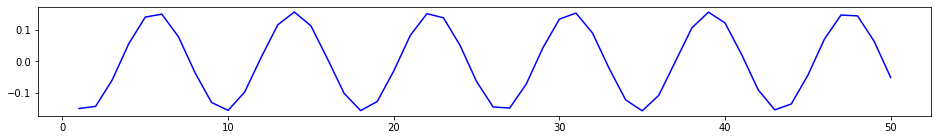

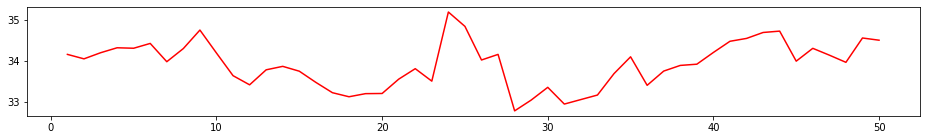

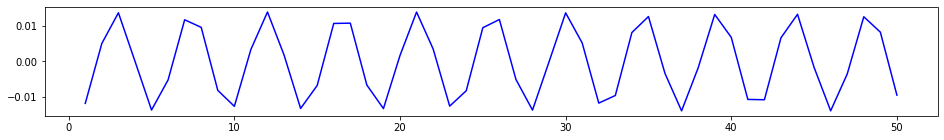

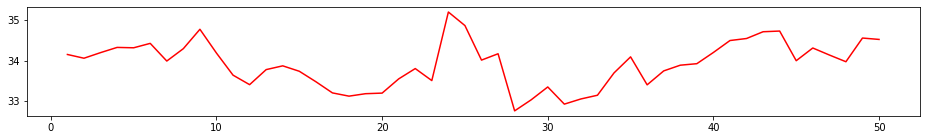

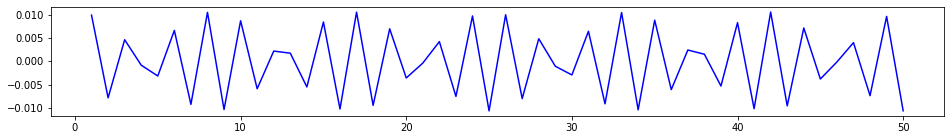

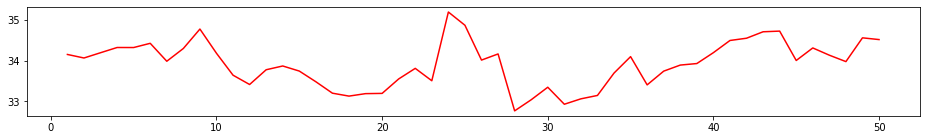

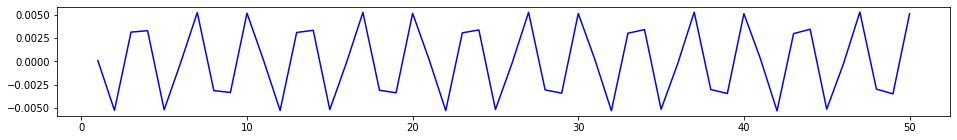

In [ ]:
#driver program
import warnings
warnings.filterwarnings("ignore")

temp_arr=arr
for i in range(120):
  angl=angle_for_mx_val(temp_arr)
  amp1,amp2=calc_amplitude_for_angle(temp_arr,angl)
  temp2_arr=back_calculation_using_amplitude(temp_arr,angl,amp1,amp2)
  temp_arr=temp_arr-temp2_arr
  print(angl,amp1,amp2)
  draw_graph(temp_arr,'red')
  draw_graph(temp2_arr,'blue')